In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import gaitFunctions
import plotClip

In [2]:
# navigate to directory that contains the data
os.chdir('/Users/ianwoods/OneDrive - Ithaca College/movement_disorder_paper_2023/videos_exemplaris/analyses_summaries/')
for f in sorted(glob.glob('*.xlsx')):
    print(f)

all_exemplaris_through_9Nov23_combined.xlsx
iw_9Nov23_exemplaris_inverted_combined.xlsx


In [3]:
# specify the data file
data_file = 'iw_9Nov23_exemplaris_inverted_combined.xlsx'

In [4]:
'''
Nirody figure 1A, 1B ... tardigrade size
they report body length 350.40 ± 46.04 (standard deviation)
n = 43 tardigrades

the tardigrade they show in 1B looks like a young one, with no eggs . . . 
but ours are smaller?
''' 

# load the path summaries data into a dataframe
path_df = pd.read_excel(data_file, sheet_name='path_summaries', index_col=None)
num_tardigrades = len(path_df.individual.values)
body_lengths = path_df['Body Length (mm)'].values * 1000
body_length = np.round(np.mean(body_lengths),2)
body_length_sd = np.round(np.std(body_lengths),2)

print('n = ' + str(num_tardigrades) + ' tardigrades')
print('body length = ' + str(body_length) + ' ± ' + str(body_length_sd) + ' µm')


n = 14 tardigrades
body length = 226.24 ± 34.05 µm


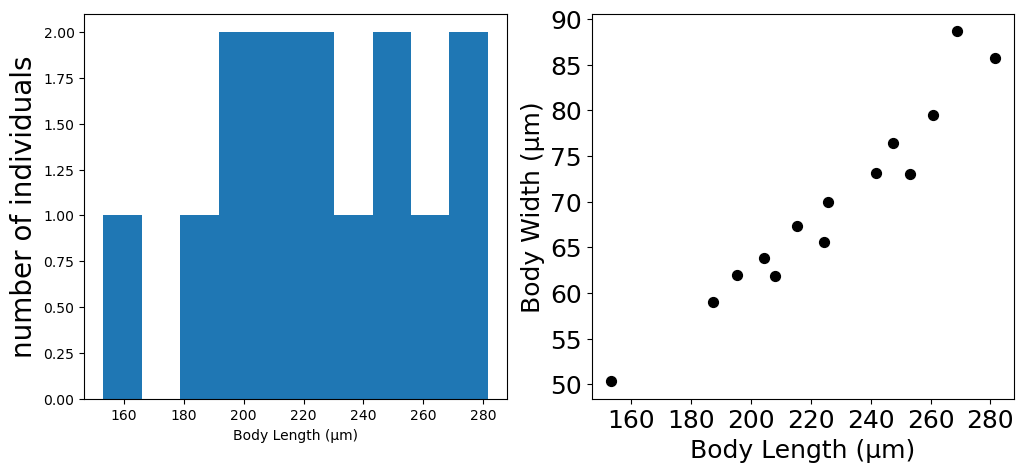

In [11]:
# more about size ... 
f,(a1,a2) = plt.subplots(1,2,figsize=(12,5))
a1.hist(body_lengths)
a1.set_ylabel('number of individuals',fontsize=20)
a1.set_xlabel('Body Length (µm)')
body_widths = path_df['Body Width (mm)'].values * 1000
a2.scatter(body_lengths,body_widths,s=50,c='k')
a2.set_ylabel('Body Width (µm)',fontsize=18)
a2.set_xlabel('Body Length (µm)',fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

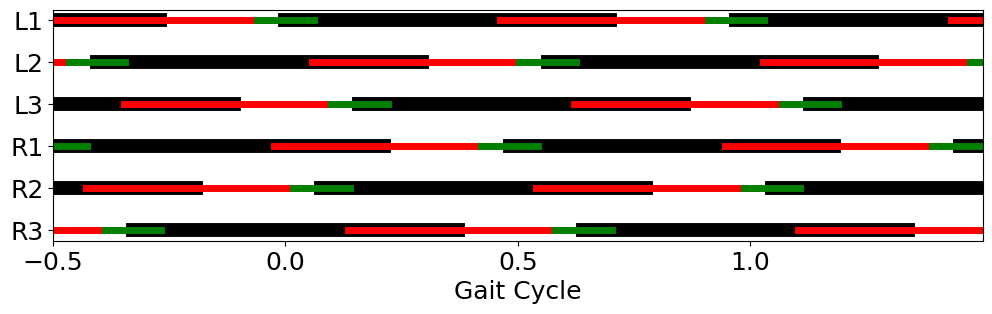

In [6]:
'''
Nirody figure 1C ... podogram
red bars show std of stance duration and swing duration
''' 

# load the step timing data into a dataframe
step_df = pd.read_excel(data_file, sheet_name='step_timing', index_col=None)
step_df.head(3)

plot_order = ['R3','R2','R1','L3','L2','L1']

stances = step_df[step_df.legID.isin(plot_order)].stance.values
stances_mean = np.mean(stances)
stances_std = np.std(stances)

swings = step_df[step_df.legID.isin(plot_order)].swing.values
swings_mean = np.mean(swings)
swings_std = np.std(swings)
gait_cycle = stances_mean + swings_mean

ipsilateral_offset_mean = np.nanmean(step_df[step_df.legID.isin(plot_order)]['anterior_offsets'].values)
contralateral_offset_mean = np.nanmean(step_df[step_df.legID.isin(plot_order)]['contralateral_offsets'].values)

leg_offsets = {}
for i, leg in enumerate(['R3','R2','R1']):
    leg_offsets[leg] = i * ipsilateral_offset_mean
for leg in ['R3','R2','R1']:
    contralateral_leg = 'L' + leg[1:]
    leg_offsets[contralateral_leg] = leg_offsets[leg] + contralateral_offset_mean

start_leg = 'L1'
plot_leg_offsets = {}
for k,v in leg_offsets.items():
    plot_leg_offsets[k] = leg_offsets[k] - leg_offsets[start_leg]

f,a = plt.subplots(1, figsize = (12,3))

for i,leg in enumerate(plot_order):
    first_start = plot_leg_offsets[leg]
    for j in [-1,0,1,2]:
        start_stance = first_start + (j * gait_cycle)
        end_stance = start_stance + stances_mean
        # plot stances
        plt.plot([start_stance,end_stance],[i,i],'k',linewidth=10)
        # plot stance errors
        plt.plot([end_stance-stances_std,end_stance+stances_std],[i,i],'r',linewidth=5)
        # plot swing_errors
        plt.plot([start_stance-swings_std,start_stance+swings_std],[i,i],'g',linewidth=5)

xlims = [-0.5,1.5]     
a.set_xlim(xlims)  
a.set_xlabel('Gait Cycle',fontsize=18)
a.set_xticks(np.arange(xlims[0],xlims[1],0.5))
a.set_yticks(np.arange(0,len(plot_order)))
a.set_yticklabels(plot_order)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

In [ ]:
print(step_df.columns)